In [1]:
import os
from matplotlib import pyplot as plt
from obspy import UTCDateTime
import obspy
import numpy as np
import ccfj

In [2]:
Datadir = '/shdisk/lab9/FJ-Validation/zhengbl/2011-11-06-mw57-oklahoma-3/'
st = obspy.read(Datadir+'*SAC')
nst = len(st)
nwin = 3
nf = 1000
minc = 2000
maxc = 6000
nc = 1200
stride = 10
EQT = 60 # Event time 60s
EventT = 0
V1 = [3.2,3.7]
V2 = [3.7,4.2]

In [3]:
############# prepare ###################
tmp = []
for a in st:
    tmp.append(a.stats.sac['npts'])
npts = min(tmp)
T = np.linspace(0,npts-1,npts)*st[0].stats.sac['delta'] - EQT
u0 = np.zeros([nst,npts])
winl = np.zeros([nwin,nst])
winr = np.zeros([nwin,nst])
r = np.zeros(nst)
Fs = 1.0/st[0].stats.sac['delta']
f = Fs*np.linspace(0,nf-1,nf)/npts
c = np.linspace(minc,maxc,nc)
for i in range(nst):
    u0[i,:] = st[i].data[0:npts]
    r[i] = st[i].stats.sac['dist']
    winl[0,i] = 0
    winr[0,i] = npts-1
    winl[1,i] = r[i]/V2[0] + EQT - 5 # 5s provides margin
    winr[1,i] = r[i]/V1[0] + EQT + 5
    winl[2,i] = r[i]/V2[1] + EQT - 5
    winr[2,i] = r[i]/V1[1] + EQT + 5
    
indx = np.argsort(r)
u0 = u0[indx,:]
r = r[indx]*1e3
winl = winl[:,indx]
winr = winr[:,indx]

In [4]:
############# calculation ###############
out = ccfj.MWFJ(u0,r,c,f,Fs,nwin,winl,winr)
out1 = ccfj.MWFJ(u0,r,c,f,Fs,nwin,winl,winr,func=1)


(0, 0.4)

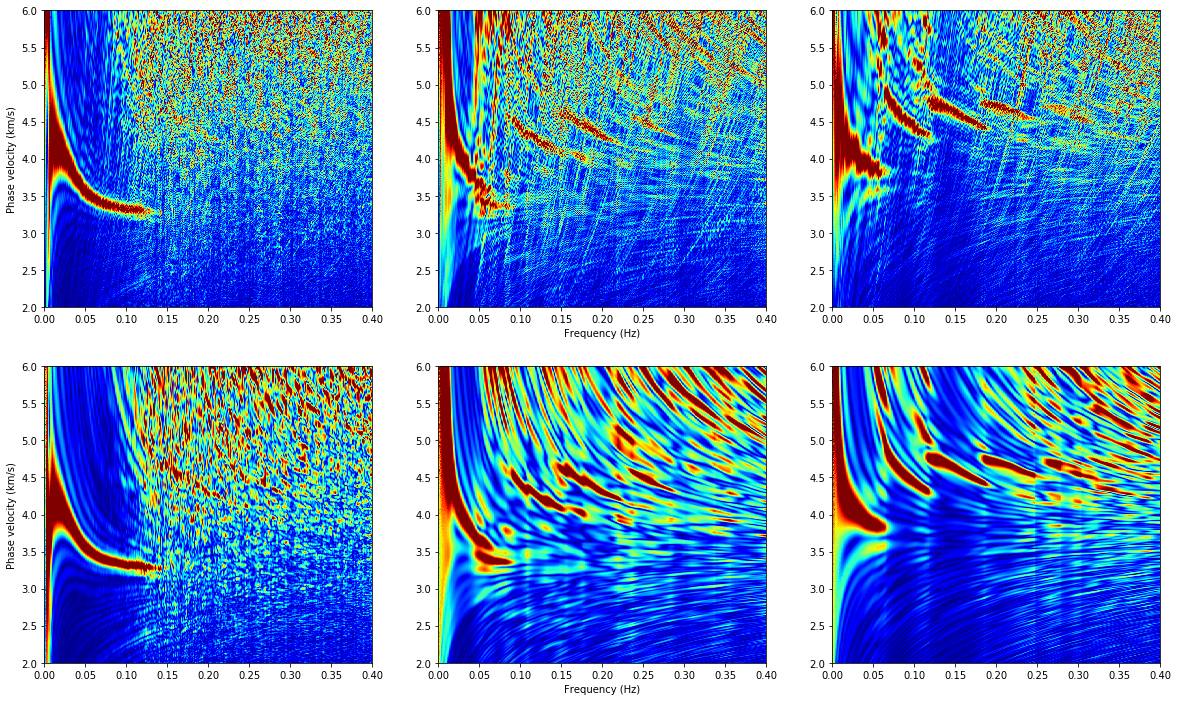

In [5]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,12))
ax[0][0].pcolormesh(f,c/1e3,out[0,:,:],vmax=0.8,cmap='jet')
ax[0][0].set_xlim([0,0.4])
ax[0][0].set_ylabel('Phase velocity (km/s)')
ax[0][1].pcolormesh(f,c/1e3,out[1,:,:],vmax=0.8,cmap='jet')
ax[0][1].set_xlim([0,0.4])
ax[0][1].set_xlabel('Frequency (Hz)')
ax[0][2].pcolormesh(f,c/1e3,out[2,:,:],vmax=0.8,cmap='jet')
ax[0][2].set_xlim([0,0.4])

ax[1][0].pcolormesh(f,c/1e3,out1[0,:,:],vmax=0.8,cmap='jet')
ax[1][0].set_xlim([0,0.4])
ax[1][0].set_ylabel('Phase velocity (km/s)')
ax[1][1].pcolormesh(f,c/1e3,out1[1,:,:],vmax=0.8,cmap='jet')
ax[1][1].set_xlim([0,0.4])
ax[1][1].set_xlabel('Frequency (Hz)')
ax[1][2].pcolormesh(f,c/1e3,out1[2,:,:],vmax=0.8,cmap='jet')
ax[1][2].set_xlim([0,0.4])